In [1]:
cd ..

/Users/crupley/gal/hoodie


In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from code.makedbs import *
from code.featurize import *

# Assessment

In [42]:
asdf = get_db('assessment')
asdf.head()

,situs_address,situs_zip,apn,re,re_improvements,pp_value,district,taxable_value,lat,lon
0,NaN,94102.0,0001001,0,0,0,General Property,0,37.808666,-122.421559
1,NaN,94102.0,0002001,0,0,0,General Property,0,37.808730,-122.420499
2,NaN,94102.0,0004002,0,0,0,General Property,0,37.808508,-122.415083
3,NaN,94102.0,0005001,0,0,0,General Property,0,37.808415,-122.416682
4,NaN,94102.0,0006001,0,0,0,General Property,0,37.808322,-122.418349


In [43]:
asdf = cut_df(asdf)
asdf.head()

,situs_address,situs_zip,apn,re,re_improvements,pp_value,district,taxable_value,lat,lon,lat_cut,lon_cut
0,NaN,94102.0,0001001,0,0,0,General Property,0,37.808666,-122.421559,37.809349,-122.420786
1,NaN,94102.0,0002001,0,0,0,General Property,0,37.808730,-122.420499,37.809349,-122.419130
2,NaN,94102.0,0004002,0,0,0,General Property,0,37.808508,-122.415083,37.809349,-122.414162
3,NaN,94102.0,0005001,0,0,0,General Property,0,37.808415,-122.416682,37.809349,-122.415818
4,NaN,94102.0,0006001,0,0,0,General Property,0,37.808322,-122.418349,37.809349,-122.417474


In [44]:
asdf = asdf[['lat_cut', 'lon_cut', 'taxable_value']]
asdf.head()

,lat_cut,lon_cut,taxable_value
0,37.809349,-122.420786,0
1,37.809349,-122.419130,0
2,37.809349,-122.414162,0
3,37.809349,-122.415818,0
4,37.809349,-122.417474,0


In [45]:
asdf = asdf.groupby(['lat_cut', 'lon_cut']).mean().reset_index().dropna()

In [48]:
print asdf.shape
asdf.head()

(5326, 3)


,lat_cut,lon_cut,taxable_value
14,37.708968,-122.493658,199352.000000
20,37.708968,-122.483721,481447.555556
21,37.708968,-122.482064,382429.700000
28,37.708968,-122.470471,164361.900000
29,37.708968,-122.468815,310925.035714


In [16]:
df = pd.DataFrame()

In [24]:
df.shape == (0, 0)

True

In [49]:
m = asdf.merge(asdf, on=['lat_cut', 'lon_cut'])
print m.shape
m.head()

(5326, 4)


,lat_cut,lon_cut,taxable_value_x,taxable_value_y
0,37.708968,-122.493658,199352.000000,199352.000000
1,37.708968,-122.483721,481447.555556,481447.555556
2,37.708968,-122.482064,382429.700000,382429.700000
3,37.708968,-122.470471,164361.900000,164361.900000
4,37.708968,-122.468815,310925.035714,310925.035714


In [111]:
asdf = make_feature_df(['assessment'])
print asdf.shape
asdf.head()

(5326, 3)


,lat_cut,lon_cut,taxable_value
14,37.708968,-122.493658,199352.000000
20,37.708968,-122.483721,481447.555556
21,37.708968,-122.482064,382429.700000
28,37.708968,-122.470471,164361.900000
29,37.708968,-122.468815,310925.035714


# Business

In [100]:
bus = get_db('business')
bus.head()

,ownership_name,dba_name,street_address,city,state,zip_code,class_code,pbc_code,lat,lon,major_class,minor_class,category
0,COUNTERPULSE,COUNTERPULSE,1310 MISSION ST,San Francisco,CA,94103,07,7389,37.776027,-122.414966,Other Business Services,"BUSINESS SERVICES, EXCEPT ADVERTISING BP73",other
1,COMMUNITY AWARENESS&TRTMT SRVC,COMMUNITY AWARENESS&TRTMT SRVC,1171 MISSION ST,San Francisco,CA,94103,07,8980,37.777878,-122.412623,Other Business Services,MISCELLANEOUS SERVICES(INCLUDING VETERINARIAN...,other
2,"EAST ARROW GROUP, LLC",TITANIUS.NET,2443 FILLMORE ST 215,San Francisco,CA,94115,07,7389,37.792190,-122.434515,Other Business Services,"BUSINESS SERVICES, EXCEPT ADVERTISING BP73",other
3,"EAST ARROW GROUP, LLC",EAG STUDIO,2443 FILLMORE ST 215,San Francisco,CA,94115,07,7389,37.792190,-122.434515,Other Business Services,"BUSINESS SERVICES, EXCEPT ADVERTISING BP73",other
4,"EAST ARROW GROUP, LLC",EAG STUDIO,295 28TH STREET 6,San Francisco,CA,94131,07,7389,37.745194,-122.428636,Other Business Services,"BUSINESS SERVICES, EXCEPT ADVERTISING BP73",other


In [101]:
bus = cut_df(bus)
bus.head()

,ownership_name,dba_name,street_address,city,state,zip_code,class_code,pbc_code,lat,lon,major_class,minor_class,category,lat_cut,lon_cut
0,COUNTERPULSE,COUNTERPULSE,1310 MISSION ST,San Francisco,CA,94103,07,7389,37.776027,-122.414966,Other Business Services,"BUSINESS SERVICES, EXCEPT ADVERTISING BP73",other,37.776641,-122.414162
1,COMMUNITY AWARENESS&TRTMT SRVC,COMMUNITY AWARENESS&TRTMT SRVC,1171 MISSION ST,San Francisco,CA,94103,07,8980,37.777878,-122.412623,Other Business Services,MISCELLANEOUS SERVICES(INCLUDING VETERINARIAN...,other,37.778896,-122.412506
2,"EAST ARROW GROUP, LLC",TITANIUS.NET,2443 FILLMORE ST 215,San Francisco,CA,94115,07,7389,37.792190,-122.434515,Other Business Services,"BUSINESS SERVICES, EXCEPT ADVERTISING BP73",other,37.792431,-122.434036
3,"EAST ARROW GROUP, LLC",EAG STUDIO,2443 FILLMORE ST 215,San Francisco,CA,94115,07,7389,37.792190,-122.434515,Other Business Services,"BUSINESS SERVICES, EXCEPT ADVERTISING BP73",other,37.792431,-122.434036
4,"EAST ARROW GROUP, LLC",EAG STUDIO,295 28TH STREET 6,San Francisco,CA,94131,07,7389,37.745194,-122.428636,Other Business Services,"BUSINESS SERVICES, EXCEPT ADVERTISING BP73",other,37.746188,-122.427411


In [102]:
bus = bus[['lat_cut', 'lon_cut', 'category']]
bus['count'] = 1
bus.head()

,lat_cut,lon_cut,category,count
0,37.776641,-122.414162,other,1
1,37.778896,-122.412506,other,1
2,37.792431,-122.434036,other,1
3,37.792431,-122.434036,other,1
4,37.746188,-122.427411,other,1


In [103]:
bus = bus.groupby(['lat_cut', 'lon_cut', 'category']).count().reset_index().dropna()
print bus.shape
bus.head()

(11788, 4)


,lat_cut,lon_cut,category,count
204,37.708968,-122.487033,other,3
226,37.708968,-122.483721,other,2
237,37.708968,-122.482064,other,1
318,37.708968,-122.470471,retail,1
325,37.708968,-122.468815,other,1


In [104]:
bus = bus.merge(bus.pivot(columns = 'category', values = 'count').fillna(0), left_index=True, right_index=True)
bus.drop('category', axis = 1, inplace = True)
print bus.shape
bus.head()

(11788, 14)


,lat_cut,lon_cut,count,bars,entertainment,grocery,hotel,laundry,medical,other,parking,personal_care,restaurant,retail
204,37.708968,-122.487033,3,0,0,0,0,0,0,3,0,0,0,0
226,37.708968,-122.483721,2,0,0,0,0,0,0,2,0,0,0,0
237,37.708968,-122.482064,1,0,0,0,0,0,0,1,0,0,0,0
318,37.708968,-122.470471,1,0,0,0,0,0,0,0,0,0,0,1
325,37.708968,-122.468815,1,0,0,0,0,0,0,1,0,0,0,0


In [105]:
bus = bus.groupby(['lat_cut', 'lon_cut']).sum().reset_index()
print bus.shape
bus.head()

(4967, 14)


,lat_cut,lon_cut,count,bars,entertainment,grocery,hotel,laundry,medical,other,parking,personal_care,restaurant,retail
0,37.708968,-122.487033,3,0,0,0,0,0,0,3,0,0,0,0
1,37.708968,-122.483721,2,0,0,0,0,0,0,2,0,0,0,0
2,37.708968,-122.482064,1,0,0,0,0,0,0,1,0,0,0,0
3,37.708968,-122.470471,1,0,0,0,0,0,0,0,0,0,0,1
4,37.708968,-122.468815,2,0,0,0,0,0,0,1,0,0,0,1


In [107]:
bus.sum(axis=0)

lat_cut          187535.237365
lon_cut         -608154.742748
count            105807.000000
bars                159.000000
entertainment        27.000000
grocery             939.000000
hotel               521.000000
laundry             577.000000
medical            3130.000000
other             85800.000000
parking             867.000000
personal_care      1578.000000
restaurant         4124.000000
retail             8085.000000
dtype: float64

In [114]:
bus = bus[['lat_cut', 'lon_cut', 'grocery', 'restaurant', 'retail']]
print bus.shape
bus.head()

(4967, 5)


,lat_cut,lon_cut,grocery,restaurant,retail
0,37.708968,-122.487033,0,0,0
1,37.708968,-122.483721,0,0,0
2,37.708968,-122.482064,0,0,0
3,37.708968,-122.470471,0,0,1
4,37.708968,-122.468815,0,0,1


In [116]:
bus = make_feature_df(['business'])
print bus.shape
bus.head()

(4967, 5)


,lat_cut,lon_cut,grocery,restaurant,retail
0,37.708968,-122.487033,0,0,0
1,37.708968,-122.483721,0,0,0
2,37.708968,-122.482064,0,0,0
3,37.708968,-122.470471,0,0,1
4,37.708968,-122.468815,0,0,1


In [197]:
df = make_feature_df(['assessment', 'business'])
print df.shape
df.head()

loading  usc_pop
loading  assessment
loading  business
(5822, 7)


,lat_cut,lon_cut,pop,taxable_value,grocery,restaurant,retail
0,37.708968,-122.492001,0,0.000000,0,0,0.000000
1,37.708968,-122.483721,0,481447.555556,0,0,0.000000
2,37.708968,-122.470471,96,164361.900000,0,0,0.010417
3,37.708968,-122.468815,0,310925.035714,0,0,0.000000
4,37.708968,-122.467159,0,22400.851852,0,0,0.000000


# sfpd

In [119]:
cdat = get_db('sfpd')
print cdat.shape
cdat.head()

(1830772, 7)


,category,descript,pddistrict,address,lon,lat,datetime
0,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",TARAVAL,19TH AV / HOLLOWAY AV,-122.475222,37.721057,2015-10-18 23:54:00
1,BURGLARY,"BURGLARY, HOT PROWL, FORCIBLE ENTRY",CENTRAL,700 Block of BAY ST,-122.419359,37.804838,2015-10-18 23:37:00
2,OTHER OFFENSES,TRAFFIC VIOLATION,INGLESIDE,PERSIA AV / DUBLIN ST,-122.426390,37.718561,2015-10-18 23:34:00
3,ASSAULT,THREATS AGAINST LIFE,TENDERLOIN,200 Block of LEAVENWORTH ST,-122.414218,37.783259,2015-10-18 23:30:00
4,ROBBERY,"ROBBERY, BODILY FORCE",SOUTHERN,1000 Block of MARKET ST,-122.411340,37.781271,2015-10-18 23:30:00


In [120]:
cdat = cut_df(cdat)

print cdat.shape
cdat.head()

(1830503, 9)


,category,descript,pddistrict,address,lon,lat,datetime,lat_cut,lon_cut
0,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",TARAVAL,19TH AV / HOLLOWAY AV,-122.475222,37.721057,2015-10-18 23:54:00,37.721375,-122.473784
1,BURGLARY,"BURGLARY, HOT PROWL, FORCIBLE ENTRY",CENTRAL,700 Block of BAY ST,-122.419359,37.804838,2015-10-18 23:37:00,37.805965,-122.419130
2,OTHER OFFENSES,TRAFFIC VIOLATION,INGLESIDE,PERSIA AV / DUBLIN ST,-122.426390,37.718561,2015-10-18 23:34:00,37.719119,-122.425755
3,ASSAULT,THREATS AGAINST LIFE,TENDERLOIN,200 Block of LEAVENWORTH ST,-122.414218,37.783259,2015-10-18 23:30:00,37.783408,-122.414162
4,ROBBERY,"ROBBERY, BODILY FORCE",SOUTHERN,1000 Block of MARKET ST,-122.411340,37.781271,2015-10-18 23:30:00,37.782280,-122.410849


In [122]:
cdat['count'] = 1
cdat = cdat.groupby(['lat_cut', 'lon_cut']).count().dropna().reset_index()
cdat = cdat[['lat_cut', 'lon_cut', 'count']]
print cdat.shape
cdat.head()


(5132, 3)


,lat_cut,lon_cut,count
0,37.708968,-122.485377,119
1,37.708968,-122.470471,12
2,37.708968,-122.468815,56
3,37.708968,-122.465503,89
4,37.708968,-122.463847,42


In [124]:
db = 'sfpd'
df1 = get_db(db)
df1 = cut_df(df1)

In [125]:
df1['count'] = 1

In [126]:
df = make_feature_df(['sfpd'])
print df.shape
df.head()

loading  sfpd
(5132, 3)


,lat_cut,lon_cut,count
0,37.708968,-122.485377,119
1,37.708968,-122.470471,12
2,37.708968,-122.468815,56
3,37.708968,-122.465503,89
4,37.708968,-122.463847,42


In [127]:
df = make_feature_df(['assessment', 'business', 'sfpd'])
print df.shape
df.head()

loading  assessment
loading  business
loading  sfpd
(5671, 7)


,lat_cut,lon_cut,taxable_value,grocery,restaurant,retail,count
0,37.708968,-122.493658,199352.000000,0,0,0,0
1,37.708968,-122.483721,481447.555556,0,0,0,0
2,37.708968,-122.482064,382429.700000,0,0,0,0
3,37.708968,-122.470471,164361.900000,0,0,1,12
4,37.708968,-122.468815,310925.035714,0,0,1,56


# Age/gender

In [130]:
df1 = get_db('usc_age_gender')
print df1.shape
df1.head()

(7386, 53)


,block,block_group,tract,id2,total,m,m_u5,m_5_9,m_10_14,m_15_17,...,f_50_54,f_55_59,f_60_61,f_62_64,f_65_66,f_67_69,f_70_74,f_75_79,f_80_84,f_85_over
0,101,1,1000,60750101001000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,101,1,1001,60750101001001,44,31,0,0,1,0,...,1,1,0,0,1,0,0,0,0,0
2,101,1,1002,60750101001002,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,101,1,1003,60750101001003,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,101,1,1004,60750101001004,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
df2 = get_db('usc_shapefile')
print df2.shape
df2.head()

(7386, 11)


,state,county,tract,block,geoid,name,mtfcc,land_area,water_area,lat,lon
0,06,075,021300,2002,60750213002002,Block 2002,G5040,16958,0,37.750067,-122.441075
1,06,075,021300,2000,60750213002000,Block 2000,G5040,16823,0,37.750196,-122.438933
2,06,075,020500,3004,60750205003004,Block 3004,G5040,17020,0,37.756794,-122.436270
3,06,075,021200,1003,60750212001003,Block 1003,G5040,16415,0,37.753529,-122.437050
4,06,075,021100,4001,60750211004001,Block 4001,G5040,17523,0,37.755758,-122.433400


In [132]:
df1 = df1.merge(df2, left_on = 'id2', right_on = 'geoid')
print df1.shape
df1.head()

(7386, 64)


,block_x,block_group,tract_x,id2,total,m,m_u5,m_5_9,m_10_14,m_15_17,...,county,tract_y,block_y,geoid,name,mtfcc,land_area,water_area,lat,lon
0,101,1,1000,60750101001000,0,0,0,0,0,0,...,075,010100,1000,60750101001000,Block 1000,G5040,0,646925,37.809475,-122.409779
1,101,1,1001,60750101001001,44,31,0,0,1,0,...,075,010100,1001,60750101001001,Block 1001,G5040,243533,0,37.808522,-122.409559
2,101,1,1002,60750101001002,0,0,0,0,0,0,...,075,010100,1002,60750101001002,Block 1002,G5040,3062,0,37.806984,-122.406458
3,101,1,1003,60750101001003,0,0,0,0,0,0,...,075,010100,1003,60750101001003,Block 1003,G5040,1323,0,37.807758,-122.408149
4,101,1,1004,60750101001004,1,0,0,0,0,0,...,075,010100,1004,60750101001004,Block 1004,G5040,15453,0,37.808645,-122.414515


In [134]:
df1 = cut_df(df1)
print df1.shape
df1.head()

(7334, 66)


,block_x,block_group,tract_x,id2,total,m,m_u5,m_5_9,m_10_14,m_15_17,...,block_y,geoid,name,mtfcc,land_area,water_area,lat,lon,lat_cut,lon_cut
0,101,1,1000,60750101001000,0,0,0,0,0,0,...,1000,60750101001000,Block 1000,G5040,0,646925,37.809475,-122.409779,37.810477,-122.409193
1,101,1,1001,60750101001001,44,31,0,0,1,0,...,1001,60750101001001,Block 1001,G5040,243533,0,37.808522,-122.409559,37.809349,-122.409193
2,101,1,1002,60750101001002,0,0,0,0,0,0,...,1002,60750101001002,Block 1002,G5040,3062,0,37.806984,-122.406458,37.807093,-122.405881
3,101,1,1003,60750101001003,0,0,0,0,0,0,...,1003,60750101001003,Block 1003,G5040,1323,0,37.807758,-122.408149,37.808221,-122.407537
4,101,1,1004,60750101001004,1,0,0,0,0,0,...,1004,60750101001004,Block 1004,G5040,15453,0,37.808645,-122.414515,37.809349,-122.414162


In [137]:
df1 = df1.groupby(['lat_cut', 'lon_cut']).sum().dropna().reset_index()
print df1.shape
df1.head()

(4361, 58)


,lat_cut,lon_cut,block_x,block_group,tract_x,total,m,m_u5,m_5_9,m_10_14,...,f_65_66,f_67_69,f_70_74,f_75_79,f_80_84,f_85_over,land_area,water_area,lat,lon
0,37.708968,-122.492001,604.00,1,1033,0,0,0,0,0,...,0,0,0,0,0,0,108710,0,37.708770,-122.493607
1,37.708968,-122.483721,604.00,1,1036,0,0,0,0,0,...,0,0,0,0,0,0,1083,0,37.708705,-122.485346
2,37.708968,-122.470471,1230.04,7,7089,96,44,0,4,4,...,0,1,4,0,0,0,21666,0,113.126465,-367.413118
3,37.708968,-122.468815,313.02,3,3034,0,0,0,0,0,...,0,0,0,0,0,0,5568,0,37.708372,-122.468858
4,37.708968,-122.467159,524.00,10,10017,0,0,0,0,0,...,0,0,0,0,0,0,12945,0,75.417152,-244.935891


In [140]:
df1['sgnf'] = (2 * df1.f / df1.total).fillna(0)
print df1.shape
df1.head()

(4361, 59)


,lat_cut,lon_cut,block_x,block_group,tract_x,total,m,m_u5,m_5_9,m_10_14,...,f_67_69,f_70_74,f_75_79,f_80_84,f_85_over,land_area,water_area,lat,lon,sgnf
0,37.708968,-122.492001,604.00,1,1033,0,0,0,0,0,...,0,0,0,0,0,108710,0,37.708770,-122.493607,0.000000
1,37.708968,-122.483721,604.00,1,1036,0,0,0,0,0,...,0,0,0,0,0,1083,0,37.708705,-122.485346,0.000000
2,37.708968,-122.470471,1230.04,7,7089,96,44,0,4,4,...,1,4,0,0,0,21666,0,113.126465,-367.413118,1.083333
3,37.708968,-122.468815,313.02,3,3034,0,0,0,0,0,...,0,0,0,0,0,5568,0,37.708372,-122.468858,0.000000
4,37.708968,-122.467159,524.00,10,10017,0,0,0,0,0,...,0,0,0,0,0,12945,0,75.417152,-244.935891,0.000000


In [142]:
df1 = df1[['lat_cut', 'lon_cut', 'sgnf']]
print df1.shape
df1.head()

(4361, 3)


,lat_cut,lon_cut,sgnf
0,37.708968,-122.492001,0.000000
1,37.708968,-122.483721,0.000000
2,37.708968,-122.470471,1.083333
3,37.708968,-122.468815,0.000000
4,37.708968,-122.467159,0.000000


In [145]:
df1 = make_feature_df(['usc_age_gender'])
print df1.shape
df1.head()

loading  usc_age_gender
(4361, 3)


,lat_cut,lon_cut,sgnf
0,37.708968,-122.492001,0.000000
1,37.708968,-122.483721,0.000000
2,37.708968,-122.470471,1.083333
3,37.708968,-122.468815,0.000000
4,37.708968,-122.467159,0.000000


# Household

In [158]:
df1 = get_db('usc_household')
df1 = df1.merge(df2, left_on = 'id2', right_on = 'geoid')
df1 = cut_df(df1)
print df1.shape
df1.head()

(7334, 25)


,block_x,block_group,tract_x,id2,total,p1,p2,p3,p4,p5,...,block_y,geoid,name,mtfcc,land_area,water_area,lat,lon,lat_cut,lon_cut
0,101,1,1000,60750101001000,0,0,0,0,0,0,...,1000,60750101001000,Block 1000,G5040,0,646925,37.809475,-122.409779,37.810477,-122.409193
1,101,1,1001,60750101001001,30,22,6,2,0,0,...,1001,60750101001001,Block 1001,G5040,243533,0,37.808522,-122.409559,37.809349,-122.409193
2,101,1,1002,60750101001002,0,0,0,0,0,0,...,1002,60750101001002,Block 1002,G5040,3062,0,37.806984,-122.406458,37.807093,-122.405881
3,101,1,1003,60750101001003,0,0,0,0,0,0,...,1003,60750101001003,Block 1003,G5040,1323,0,37.807758,-122.408149,37.808221,-122.407537
4,101,1,1004,60750101001004,0,0,0,0,0,0,...,1004,60750101001004,Block 1004,G5040,15453,0,37.808645,-122.414515,37.809349,-122.414162


In [159]:
df1 = df1.groupby(['lat_cut', 'lon_cut']).sum().dropna().reset_index()
print df1.shape
df1.head()

(4361, 17)


,lat_cut,lon_cut,block_x,block_group,tract_x,total,p1,p2,p3,p4,p5,p6,p7,land_area,water_area,lat,lon
0,37.708968,-122.492001,604.00,1,1033,0,0,0,0,0,0,0,0,108710,0,37.708770,-122.493607
1,37.708968,-122.483721,604.00,1,1036,0,0,0,0,0,0,0,0,1083,0,37.708705,-122.485346
2,37.708968,-122.470471,1230.04,7,7089,28,4,8,3,6,3,1,3,21666,0,113.126465,-367.413118
3,37.708968,-122.468815,313.02,3,3034,0,0,0,0,0,0,0,0,5568,0,37.708372,-122.468858
4,37.708968,-122.467159,524.00,10,10017,0,0,0,0,0,0,0,0,12945,0,75.417152,-244.935891


In [160]:
total_p = 0
p_range = range(1,8)
for i in p_range:
    col = 'p' + str(i)
    total_p += df1[col] * i
av_p = total_p / df1.total
df1['avg_hh_size'] = av_p
df1.fillna(0, inplace=True)

print df1.shape
df1.head()

(4361, 18)


,lat_cut,lon_cut,block_x,block_group,tract_x,total,p1,p2,p3,p4,p5,p6,p7,land_area,water_area,lat,lon,avg_hh_size
0,37.708968,-122.492001,604.00,1,1033,0,0,0,0,0,0,0,0,108710,0,37.708770,-122.493607,0.000000
1,37.708968,-122.483721,604.00,1,1036,0,0,0,0,0,0,0,0,1083,0,37.708705,-122.485346,0.000000
2,37.708968,-122.470471,1230.04,7,7089,28,4,8,3,6,3,1,3,21666,0,113.126465,-367.413118,3.392857
3,37.708968,-122.468815,313.02,3,3034,0,0,0,0,0,0,0,0,5568,0,37.708372,-122.468858,0.000000
4,37.708968,-122.467159,524.00,10,10017,0,0,0,0,0,0,0,0,12945,0,75.417152,-244.935891,0.000000


In [161]:
df1 = df1[['lat_cut', 'lon_cut', 'avg_hh_size']]
print df1.shape
df1.head()

(4361, 3)


,lat_cut,lon_cut,avg_hh_size
0,37.708968,-122.492001,0.000000
1,37.708968,-122.483721,0.000000
2,37.708968,-122.470471,3.392857
3,37.708968,-122.468815,0.000000
4,37.708968,-122.467159,0.000000


In [163]:
df1 = make_feature_df(['usc_household'])
print df1.shape
df1.head()

loading  usc_household

(4361, 3)


,lat_cut,lon_cut,avg_hh_size
0,37.708968,-122.492001,0.000000
1,37.708968,-122.483721,0.000000
2,37.708968,-122.470471,3.392857
3,37.708968,-122.468815,0.000000
4,37.708968,-122.467159,0.000000


# Population

In [164]:
df1 = get_db('usc_pop')
df1 = df1.merge(df2, left_on = 'id2', right_on = 'geoid')
df1 = cut_df(df1)
print df1.shape
df1.head()

(7334, 18)


,block_x,block_group,tract_x,id2,total,state,county,tract_y,block_y,geoid,name,mtfcc,land_area,water_area,lat,lon,lat_cut,lon_cut
0,101,1,1000,60750101001000,0,06,075,010100,1000,60750101001000,Block 1000,G5040,0,646925,37.809475,-122.409779,37.810477,-122.409193
1,101,1,1001,60750101001001,44,06,075,010100,1001,60750101001001,Block 1001,G5040,243533,0,37.808522,-122.409559,37.809349,-122.409193
2,101,1,1002,60750101001002,0,06,075,010100,1002,60750101001002,Block 1002,G5040,3062,0,37.806984,-122.406458,37.807093,-122.405881
3,101,1,1003,60750101001003,0,06,075,010100,1003,60750101001003,Block 1003,G5040,1323,0,37.807758,-122.408149,37.808221,-122.407537
4,101,1,1004,60750101001004,1,06,075,010100,1004,60750101001004,Block 1004,G5040,15453,0,37.808645,-122.414515,37.809349,-122.414162


In [166]:
df1 = df1.groupby(['lat_cut', 'lon_cut']).sum().dropna().reset_index()
print df1.shape
df1.head()

(4361, 10)


,lat_cut,lon_cut,block_x,block_group,tract_x,total,land_area,water_area,lat,lon
0,37.708968,-122.492001,604.00,1,1033,0,108710,0,37.708770,-122.493607
1,37.708968,-122.483721,604.00,1,1036,0,1083,0,37.708705,-122.485346
2,37.708968,-122.470471,1230.04,7,7089,96,21666,0,113.126465,-367.413118
3,37.708968,-122.468815,313.02,3,3034,0,5568,0,37.708372,-122.468858
4,37.708968,-122.467159,524.00,10,10017,0,12945,0,75.417152,-244.935891


In [168]:
df1 = df1[['lat_cut', 'lon_cut', 'total']]
df1.columns = ['lat_cut', 'lon_cut', 'pop']
print df1.shape
df1.head()

(4361, 3)


,lat_cut,lon_cut,pop
0,37.708968,-122.492001,0
1,37.708968,-122.483721,0
2,37.708968,-122.470471,96
3,37.708968,-122.468815,0
4,37.708968,-122.467159,0


In [169]:
df1 = make_feature_df(['usc_pop'])
print df1.shape
df1.head()

loading  usc_pop

(4361, 3)


,lat_cut,lon_cut,pop
0,37.708968,-122.492001,0
1,37.708968,-122.483721,0
2,37.708968,-122.470471,96
3,37.708968,-122.468815,0
4,37.708968,-122.467159,0


# walkscore

In [174]:
df1 = get_db('walkscore')
print df1.shape
df1.head()

(5032, 7)


,lat,lon,walkscore,description,updated,searched_lat,searched_lon
0,37.7190,-122.5185,1,Car-Dependent,2013-08-10 17:19:49.723670,37.719347,-122.518079
1,37.7205,-122.5185,0,Car-Dependent,2015-06-16 02:11:34.261700,37.720717,-122.518079
2,37.7220,-122.5185,2,Car-Dependent,2013-08-10 17:20:27.329400,37.722088,-122.518079
3,37.7235,-122.5185,0,Car-Dependent,2014-09-05 10:53:05.520620,37.723458,-122.518079
4,37.7250,-122.5185,0,Car-Dependent,2015-06-16 02:11:33.920510,37.724829,-122.518079


In [177]:
df1 = cut_df(df1)
print df1.shape
df1.head()

(4891, 9)


,lat,lon,walkscore,description,updated,searched_lat,searched_lon,lat_cut,lon_cut
68,37.7190,-122.517,2,Car-Dependent,2013-08-10 17:19:49.763940,37.719347,-122.516345,37.719119,-122.516844
69,37.7205,-122.517,2,Car-Dependent,2013-08-10 17:20:07.941830,37.720717,-122.516345,37.721375,-122.516844
70,37.7220,-122.517,2,Car-Dependent,2013-08-10 17:20:27.351960,37.722088,-122.516345,37.722502,-122.516844
71,37.7235,-122.517,3,Car-Dependent,2013-08-10 17:20:45.532460,37.723458,-122.516345,37.723630,-122.516844
72,37.7250,-122.517,3,Car-Dependent,2013-08-10 17:21:07.279060,37.724829,-122.516345,37.725886,-122.516844


In [179]:
df1 = df1.groupby(['lat_cut', 'lon_cut']).mean().dropna().reset_index()
print df1.shape
df1.head()

(4489, 7)


,lat_cut,lon_cut,lat,lon,walkscore,searched_lat,searched_lon
0,37.719119,-122.516844,37.719,-122.5170,2,37.719347,-122.516345
1,37.719119,-122.513532,37.719,-122.5140,2,37.719347,-122.514612
2,37.719119,-122.511875,37.719,-122.5125,3,37.719347,-122.512878
3,37.719119,-122.510219,37.719,-122.5110,3,37.719347,-122.511144
4,37.719119,-122.508563,37.719,-122.5095,4,37.719347,-122.509410


In [181]:
df1 = df1[['lat_cut', 'lon_cut', 'walkscore']]
print df1.shape
df1.head()

(4489, 3)


,lat_cut,lon_cut,walkscore
0,37.719119,-122.516844,2
1,37.719119,-122.513532,2
2,37.719119,-122.511875,3
3,37.719119,-122.510219,3
4,37.719119,-122.508563,4


In [191]:
df1 = make_feature_df(['walkscore'])
print df1.shape
df1.head()

loading  walkscore
(4489, 3)


,lat_cut,lon_cut,walkscore
0,37.719119,-122.516844,2
1,37.719119,-122.513532,2
2,37.719119,-122.511875,3
3,37.719119,-122.510219,3
4,37.719119,-122.508563,4


# All features

In [187]:
df = make_feature_df(['assessment', 'business', 'sfpd', 
                      'usc_age_gender', 'usc_household',
                      'usc_pop', 'walkscore'])
print df.shape
df.head()

loading  assessment
loading  business
loading  sfpd
loading  usc_age_gender
loading  usc_household
loading  usc_pop
loading  walkscore
(7210, 11)


,lat_cut,lon_cut,taxable_value,grocery,restaurant,retail,ncrimes,sgnf,avg_hh_size,pop,walkscore
0,37.708968,-122.493658,199352.000000,0,0,0,0,0.000000,0.000000,0,0
1,37.708968,-122.483721,481447.555556,0,0,0,0,0.000000,0.000000,0,0
2,37.708968,-122.482064,382429.700000,0,0,0,0,0.000000,0.000000,0,0
3,37.708968,-122.470471,164361.900000,0,0,1,12,1.083333,3.392857,96,0
4,37.708968,-122.468815,310925.035714,0,0,1,56,0.000000,0.000000,0,0


# Inner join

In [198]:
df = make_feature_df(['assessment', 'business', 'sfpd', 
                      'usc_age_gender', 'usc_household',
                      'usc_pop', 'walkscore'])
print df.shape
df.head()

loading  usc_pop
loading  assessment
loading  business
loading  sfpd
loading  usc_age_gender
loading  usc_household
loading  walkscore
(2468, 11)


,lat_cut,lon_cut,pop,taxable_value,grocery,restaurant,retail,ncrimes,sgnf,avg_hh_size,walkscore
0,37.708957,-122.469312,96,310296.903226,0,0,0.010417,0.375000,0.083333,3.392857,58.0
1,37.708957,-122.467672,0,22653.473684,0,0,0.000000,0.000000,-1.000000,0.000000,57.0
2,37.708957,-122.464393,164,341233.227273,0,0,0.000000,0.621951,0.048780,3.974359,74.5
3,37.708957,-122.462754,134,323994.947368,0,0,0.000000,0.820896,0.059701,3.410256,72.0
4,37.708957,-122.461114,22,300802.750000,0,0,0.000000,1.727273,0.090909,3.666667,82.0


In [199]:
# 300x300
df = make_feature_df(['assessment', 'business', 'sfpd', 
                      'usc_age_gender', 'usc_household',
                      'usc_pop', 'walkscore'])
print df.shape
df.head()

loading  usc_pop
loading  assessment
loading  business
loading  sfpd
loading  usc_age_gender
loading  usc_household
loading  walkscore
(99, 11)


,lat_cut,lon_cut,pop,taxable_value,grocery,restaurant,retail,ncrimes,sgnf,avg_hh_size,walkscore
0,37.710073,-122.452369,249,364027.142857,0,0.000000,0.004016,0.132530,0.020080,3.718750,82
1,37.717517,-122.440346,67,754643.500000,0,0.044776,0.000000,4.432836,0.104478,3.750000,91
2,37.717517,-122.399902,77,330300.200000,0,0.000000,0.000000,1.636364,-0.012987,3.304348,69
3,37.719006,-122.467126,153,222105.400000,0,0.000000,0.000000,0.202614,0.124183,2.884615,67
4,37.719006,-122.464393,159,188840.666667,0,0.000000,0.000000,0.245283,0.056604,3.117647,66


# Feature smoothing/interpolation

In [3]:
allfeatures = ['assessment', 'business', 'sfpd', 
               'usc_age_gender', 'usc_household',
               'usc_pop', 'walkscore']

master = get_db('usc_shapefile').sort_values(['lat', 'lon'])
master = cut_df(master)
master.head()

,state,county,tract,block,geoid,name,mtfcc,land_area,water_area,lat,lon,lat_cut,lon_cut
2256,06,075,026302,2013,60750263022013,Block 2013,G5040,456,0,37.708193,-122.435082,37.708957,-122.434880
4302,06,075,026303,1013,60750263031013,Block 1013,G5040,267,0,37.708246,-122.449938,37.708957,-122.449637
3042,06,075,026200,5019,60750262005019,Block 5019,G5040,567,0,37.708302,-122.458795,37.708957,-122.457835
3821,06,075,026200,5020,60750262005020,Block 5020,G5040,1165,0,37.708334,-122.461684,37.708957,-122.461114
4773,06,075,026200,5010,60750262005010,Block 5010,G5040,861,0,37.708348,-122.466735,37.708957,-122.466033


In [4]:
xmaster = master.lon#.astype('float32')
ymaster = master.lat#.astype('float32')
xi, yi = np.meshgrid(xmaster, ymaster)
print xmaster.unique().shape
print ymaster.unique().shape

(7306,)
(7309,)


In [5]:
df = make_feature_df(['usc_pop'])
df = df.sort_values(['lat_cut', 'lon_cut'])
print df.shape
print df.lat_cut.unique().shape
print df.lon_cut.unique().shape
df.head()

(4396, 3)
(97,)
(97,)


,lat_cut,lon_cut,pop
0,37.708957,-122.492266,0
1,37.708957,-122.484068,0
2,37.708957,-122.470952,0
3,37.708957,-122.469312,96
4,37.708957,-122.467672,0


In [6]:
x = df.lon_cut.astype('float32')
y = df.lat_cut.astype('float32')
z = df['pop'].astype('int')

In [7]:
print x.shape, x.unique().shape
print y.shape, x.unique().shape
print z.shape, z.unique().shape

(4396,) (97,)
(4396,) (97,)
(4396,) (659,)


In [ ]:
# Interpolate
start_time = time()
rbf = scipy.interpolate.Rbf(x, y, z, function='linear')
zi = rbf(xi, yi)
end_time = time()
print end_time - start_time

In [8]:
plt.rcParams['figure.figsize'] = 16, 10

/Users/crupley/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


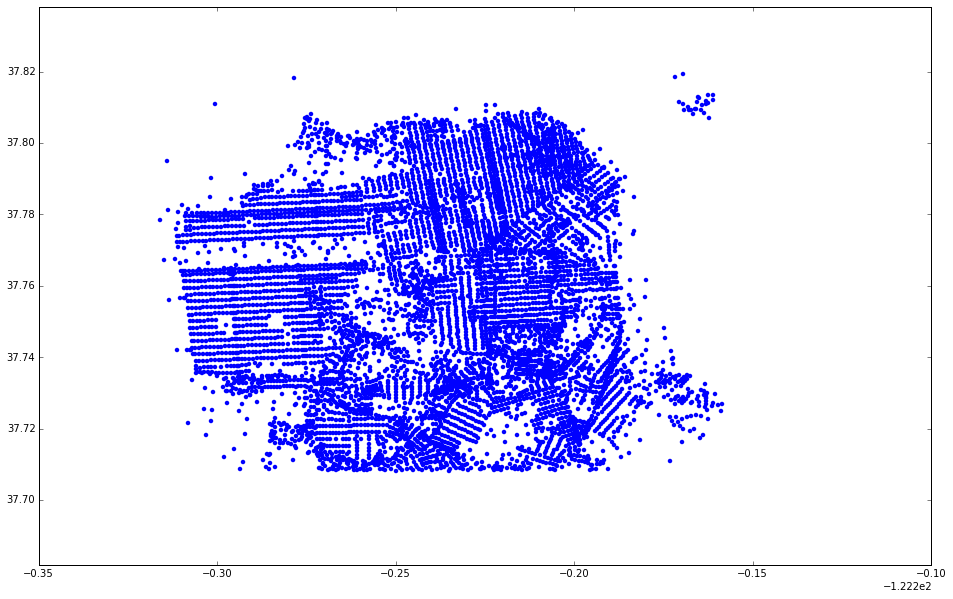

In [9]:
plt.scatter(xmaster, ymaster, linewidth=0)
plt.axis('equal');

In [10]:
from scipy.interpolate import griddata

In [11]:
np.c_[x, y].shape

(4396, 2)

In [ ]:
zi = griddata(np.c_[x, y], z, (xi, yi), method = 'nearest')

In [ ]:
plt.imshow(zi)